<h1 align="center">Introduction to Machine Learning - Course Code: 25737</h1>
<h4 align="center">Instructor: Dr. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>
<h4 align="center">Computer Assignment 3</h4>
<h4 align="center">

Question 2

</h4>

# Personal Data

In [ ]:
# Set your student number
student_number = 99102072
Name = 'Omid'
Last_Name = 'Keshavarz'

# Rules
- You are not allowed to add or remove cells. You **must use the provided space to write your code**. If you don't follow this rule, **your Practical Assignment won't be graded**.  

- Collaboration and using the internet is allowed, but your code **must be written by yourself**. **Copying code** from each other or from available resources will result in a **zero score for the assignment**.

- You are not allowed to use `torch.nn`, `torch.optim` and any activation function and loss function implemented in torch.

## Question 1) Convolutional Neural Networks ``(50 pt.)``

In this question, you'll be coding up a convolutional neural network from scratch to classify images using PyTorch.  

### Instructions
- Install PyTorch following the instructions [here](https://pytorch.org/).
- Install the [`torchinfo` package](https://github.com/TylerYep/torchinfo) to visualize the network architecture and the number of parameters. The maximum number of parameters you are allowed to use for your network is **100,000**.
- You are required to complete the functions defined in the code blocks following each question. Fill out sections of the code marked `"YOUR CODE HERE"`.
- You're free to add any number of methods within each class.
- You may also add any number of additional code blocks that you deem necessary.

### Data Preparation
In this assignment, we will use the Fashion-MNIST dataset. Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.  

#### Data

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255.  

#### Labels

Each training and test example is assigned to one of the following labels:

| Label | Description |
|-------|-------------|
| 0     | T-shirt/top |
| 1     | Trouser     |
| 2     | Pullover    |
| 3     | Dress       |
| 4     | Coat        |
| 5     | Sandal      |
| 6     | Shirt       |
| 7     | Sneaker     |
| 8     | Bag         |
| 9     | Ankle boot  |

Fashion-MNIST is included in the `torchvision` library.

In [ ]:
# Import required packages
from torchvision.datasets import FashionMNIST
from torchvision.transforms import Compose, ToTensor, Normalize
import matplotlib.pyplot as plt

In [ ]:
# Transform to normalize the data and convert to a tensor
transform = Compose([ToTensor(), Normalize((0.5,), (0.5,))])

# Download the data
dataset = FashionMNIST('MNIST_data/', download = True, train = True, transform = transform)

100%|██████████| 26421880/26421880 [00:02<00:00, 9399486.01it/s] 


Extracting MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 209528.14it/s]


Extracting MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:06<00:00, 697573.89it/s] 


Extracting MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 5639142.59it/s]

Extracting MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/FashionMNIST/raw



### Data Exploration
Let's take a look at the classes in our dataset.

In [ ]:
print(dataset.classes)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


Now, visualize an instance from each class.

4422102/4422102 [==============================] - 0s 0us/step


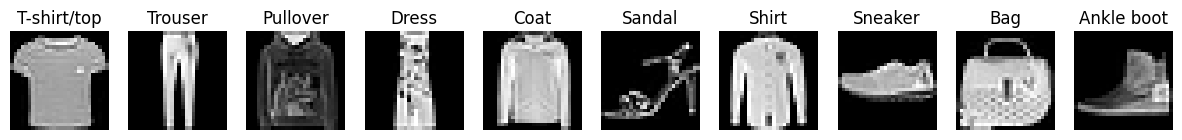

In [ ]:
#visualize 1 random image from each class of FashionMNIST by using plt.subplots
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Load the Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Define class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Find a random image for each class
num_classes = len(class_names)
fig, axes = plt.subplots(1, num_classes, figsize=(15, 3))

for i in range(num_classes):
  # Filter images for the current class
  class_indices = np.where(train_labels == i)[0]
  random_index = np.random.choice(class_indices)
  image = train_images[random_index]

  # Display the image
  axes[i].imshow(image, cmap='gray')
  axes[i].set_title(class_names[i])
  axes[i].axis('off')

plt.show()

### Creating Training and Validation Datasets

The `split_indices` function takes in the size of the entire dataset, `n`, the fraction of data to be used as validation set, `val_frac`, and the random seed and returns the indices of the data points to be added to the validation dataset.

In [ ]:
def split_indices(n, val_frac, seed):
    # Determine the size of the validation set
    n_val = int(val_frac * n)
    np.random.seed(seed)
    # Create random permutation between 0 to n-1
    idxs = np.random.permutation(n)
    # Pick first n_val indices for validation set
    return idxs[n_val:], idxs[:n_val]

In [ ]:
import numpy as np
from torch.utils.data import Subset, DataLoader

# Assuming `dataset` is already defined and loaded

def split_indices(dataset_len, val_frac, rand_seed):
    # Set seed for reproducibility
    np.random.seed(rand_seed)

    # Create shuffled indices
    indices = np.arange(dataset_len)
    np.random.shuffle(indices)

    # Calculate number of samples in validation set
    val_size = int(dataset_len * val_frac)

    # Split indices into training and validation sets
    val_indices = indices[:val_size]
    train_indices = indices[val_size:]

    return train_indices, val_indices

# Define validation fraction and random seed
val_frac = 0.2  # 20% of the data will be used for validation
rand_seed = 42  # Random seed for reproducibility

# Split indices
train_indices, val_indices = split_indices(len(dataset), val_frac, rand_seed)

# Print number of samples in each set
print("Number of samples in training set:", len(train_indices))
print("Number of samples in validation set:", len(val_indices))


Number of samples in training set: 48000
Number of samples in validation set: 12000


Next, we make use of the built-in dataloaders in PyTorch to create iterables of our our training and validation sets. This helps in avoiding fitting the whole dataset into memory and only loads a batch of the data that we can decide.

In [ ]:
# Import required packages
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

In [ ]:
from torch.utils.data import SubsetRandomSampler, DataLoader

# Define batch size
batch_size = 64  # Example batch size, you can adjust as needed

# Training sampler and data loader
train_sampler = SubsetRandomSampler(train_indices)
train_dl = DataLoader(dataset,
                      batch_size=batch_size,
                      sampler=train_sampler)

# Validation sampler and data loader
val_sampler = SubsetRandomSampler(val_indices)
val_dl = DataLoader(dataset,
                    batch_size=batch_size,
                    sampler=val_sampler)


Plot images in a sample batch of data.

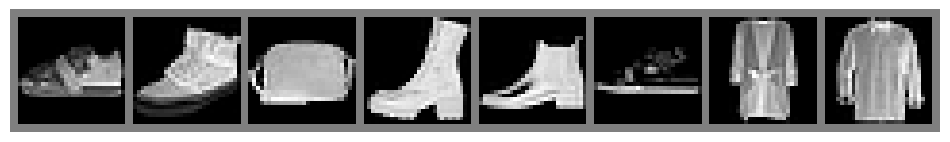

Sneaker Sneaker   Bag Ankle boot Ankle boot Sandal  Coat Shirt


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision

# Define a function to unnormalize and plot images
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize the image
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')

# Get a batch of data
dataiter = iter(train_dl)
images, labels = next(dataiter)  # Get the next batch

# Plot images from the batch
plt.figure(figsize=(12, 8))
imshow(torchvision.utils.make_grid(images[:8]))  # Plot the first 8 images
plt.show()

# Print labels
print(' '.join('%5s' % class_names[labels[j]] for j in range(8)))


### Building the Model
Create your model by defining the network architecture in the `ImageClassifierNet` class.<br>
**NOTE:** The number of parameters in your network must be $\leq$ 100,000.

In [ ]:
!pip install torchinfo

In [ ]:
# Import required packages
import torch.nn as nn
import torch.nn.functional as F
from torchinfo import summary

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class ImageClassifierNet(nn.Module):
    def __init__(self, n_channels=1):
        super(ImageClassifierNet, self).__init__()
        # Define convolutional layers
        self.conv1 = nn.Conv2d(n_channels, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        # Max pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        # Fully connected layers
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)  # Output size is 10 for 10 classes in Fashion-MNIST

    def forward(self, X):
        # Apply convolutional and pooling layers
        X = self.pool(F.relu(self.conv1(X)))
        X = self.pool(F.relu(self.conv2(X)))
        # Flatten the input for fully connected layers
        X = X.view(-1, 64 * 7 * 7)  # Adjust the 64 * 7 * 7 based on your final feature map size
        # Apply fully connected layers with ReLU activation
        X = F.relu(self.fc1(X))
        X = self.fc2(X)
        return F.log_softmax(X, dim=1)  # Apply log softmax for classification

# Create an instance of the network
model = ImageClassifierNet()

# Print the summary of the model using torchinfo
from torchinfo import summary
summary(model, input_size=(1, 28, 28))  # Assuming grayscale images (1 channel) of size 28x28


Layer (type:depth-idx)                   Output Shape              Param #
ImageClassifierNet                       [1, 10]                   --
├─Conv2d: 1-1                            [32, 28, 28]              320
├─MaxPool2d: 1-2                         [32, 14, 14]              --
├─Conv2d: 1-3                            [64, 14, 14]              18,496
├─MaxPool2d: 1-4                         [64, 7, 7]                --
├─Linear: 1-5                            [1, 128]                  401,536
├─Linear: 1-6                            [1, 10]                   1,290
Total params: 421,642
Trainable params: 421,642
Non-trainable params: 0
Total mult-adds (M): 17.26
Input size (MB): 0.00
Forward/backward pass size (MB): 0.30
Params size (MB): 1.69
Estimated Total Size (MB): 1.99

In [ ]:
model = ImageClassifierNet()

The following code block prints your network architecture. It also shows the total number of parameters in your network (see `Total params`).  

**NOTE: The total number of parameters in your model should be <= 100,000.**

In [ ]:
summary(model, input_size=(batch_size, 1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
ImageClassifierNet                       [64, 10]                  --
├─Conv2d: 1-1                            [64, 32, 28, 28]          320
├─MaxPool2d: 1-2                         [64, 32, 14, 14]          --
├─Conv2d: 1-3                            [64, 64, 14, 14]          18,496
├─MaxPool2d: 1-4                         [64, 64, 7, 7]            --
├─Linear: 1-5                            [64, 128]                 401,536
├─Linear: 1-6                            [64, 10]                  1,290
Total params: 421,642
Trainable params: 421,642
Non-trainable params: 0
Total mult-adds (M): 273.85
Input size (MB): 0.20
Forward/backward pass size (MB): 19.34
Params size (MB): 1.69
Estimated Total Size (MB): 21.23

### Train the model
Complete the `train_model` function to train your model on a dataset. Tune your network architecture and hyperparameters on the validation set.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

def train_model(n_epochs, model, train_dl, val_dl, loss_fn, opt_fn, lr):
    """
    Trains the model on a dataset.

    Args:
        n_epochs: number of epochs
        model: ImageClassifierNet object
        train_dl: training dataloader
        val_dl: validation dataloader
        loss_fn: the loss function
        opt_fn: the optimizer
        lr: learning rate

    Returns:
        The trained model.
        A tuple of (model, train_losses, val_losses, train_accuracies, val_accuracies)
    """
    # Initialize lists to store training/validation statistics
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    # Define the optimizer
    optimizer = opt_fn(model.parameters(), lr=lr)

    # Train the model
    for epoch in range(n_epochs):
        model.train()  # Set the model to training mode
        train_loss = 0.0
        correct_train = 0
        total_train = 0

        # Training loop
        for images, labels in train_dl:
            # Move tensors to the configured device (GPU or CPU)
            if torch.cuda.is_available():
                images, labels = images.cuda(), labels.cuda()

            # Forward pass
            outputs = model(images)
            loss = loss_fn(outputs, labels)

            # Backward pass and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Compute train accuracy
            _, predicted = torch.max(outputs, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

            # Accumulate loss
            train_loss += loss.item()

        # Compute average training loss and accuracy
        train_loss /= len(train_dl)
        train_accuracy = correct_train / total_train

        # Evaluate the model on validation data
        model.eval()  # Set the model to evaluation mode
        val_loss = 0.0
        correct_val = 0
        total_val = 0

        # Validation loop
        with torch.no_grad():
            for images, labels in val_dl:
                # Move tensors to the configured device (GPU or CPU)
                if torch.cuda.is_available():
                    images, labels = images.cuda(), labels.cuda()

                # Forward pass
                outputs = model(images)
                loss = loss_fn(outputs, labels)

                # Compute validation accuracy
                _, predicted = torch.max(outputs, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()

                # Accumulate loss
                val_loss += loss.item()

        # Compute average validation loss and accuracy
        val_loss /= len(val_dl)
        val_accuracy = correct_val / total_val

        # Record training/validation statistics
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)

        # Print progress
        print(f'Epoch [{epoch+1}/{n_epochs}], Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}')

    return model, train_losses, val_losses, train_accuracies, val_accuracies


In [ ]:
import torch.optim as optim

# Define training parameters
num_epochs = 10  # Example: Train for 10 epochs
loss_fn = nn.CrossEntropyLoss()  # Cross-entropy loss for multi-class classification
opt_fn = optim.Adam
lr = 0.001

# Instantiate the optimizer with model parameters and learning rate
optimizer = opt_fn(model.parameters(), lr=lr)


In [ ]:
model, train_losses, val_losses, train_accuracies, val_accuracies = train_model(num_epochs, model, train_dl, val_dl, loss_fn, opt_fn, lr)

Epoch [1/10], Train Loss: 0.4652, Train Acc: 0.8316, Val Loss: 0.3201, Val Acc: 0.8828
Epoch [2/10], Train Loss: 0.2941, Train Acc: 0.8933, Val Loss: 0.2832, Val Acc: 0.8951
Epoch [3/10], Train Loss: 0.2456, Train Acc: 0.9090, Val Loss: 0.2475, Val Acc: 0.9090
Epoch [4/10], Train Loss: 0.2161, Train Acc: 0.9204, Val Loss: 0.2307, Val Acc: 0.9133
Epoch [5/10], Train Loss: 0.1888, Train Acc: 0.9302, Val Loss: 0.2298, Val Acc: 0.9148
Epoch [6/10], Train Loss: 0.1673, Train Acc: 0.9384, Val Loss: 0.2231, Val Acc: 0.9194
Epoch [7/10], Train Loss: 0.1430, Train Acc: 0.9469, Val Loss: 0.2330, Val Acc: 0.9153
Epoch [8/10], Train Loss: 0.1279, Train Acc: 0.9525, Val Loss: 0.2342, Val Acc: 0.9218
Epoch [9/10], Train Loss: 0.1049, Train Acc: 0.9617, Val Loss: 0.2569, Val Acc: 0.9164
Epoch [10/10], Train Loss: 0.0897, Train Acc: 0.9671, Val Loss: 0.2742, Val Acc: 0.9183


### Plot loss and accuracy

In [ ]:
def plot_accuracy(train_accuracies, val_accuracies):
    """Plot accuracies"""
    plt.plot(train_accuracies, "-x")
    plt.plot(val_accuracies, "-o")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(["Training", "Validation"])
    plt.title("Accuracy vs. No. of epochs")

def plot_losses(train_losses, val_losses):
    """Plot losses"""
    plt.plot(train_losses, "-x")
    plt.plot(val_losses, "-o")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(["Training", "Validation"])
    plt.title("Loss vs. No. of Epochs")

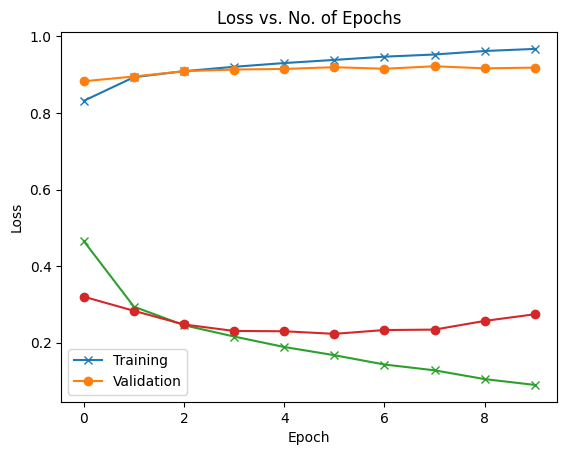

In [ ]:
plot_accuracy(train_accuracies, val_accuracies)
plot_losses(train_losses, val_losses)

### Train a model on the entire dataset

In [ ]:
indices, _ = split_indices(len(dataset), 0, rand_seed)

sampler = SubsetRandomSampler(indices)
dl = DataLoader(dataset, batch_size, sampler=sampler)

In [ ]:
num_epochs = 20  # Example: Train for 10 epochs
loss_fn = nn.CrossEntropyLoss()  # Cross-entropy loss for multi-class classification
opt_fn = optim.Adam
lr = 0.001

# Instantiate the optimizer with model parameters and learning rate
optimizer = opt_fn(model.parameters(), lr=lr)

In [ ]:
model, train_losses, val_losses, train_accuracies, val_accuracies = train_model(num_epochs, model, dl, val_dl, loss_fn, opt_fn, lr)

Epoch [1/20], Train Loss: 0.2810, Train Acc: 0.8974, Val Loss: 0.2250, Val Acc: 0.9153
Epoch [2/20], Train Loss: 0.2285, Train Acc: 0.9165, Val Loss: 0.1968, Val Acc: 0.9257
Epoch [3/20], Train Loss: 0.1928, Train Acc: 0.9282, Val Loss: 0.1649, Val Acc: 0.9412
Epoch [4/20], Train Loss: 0.1661, Train Acc: 0.9381, Val Loss: 0.1367, Val Acc: 0.9523
Epoch [5/20], Train Loss: 0.1443, Train Acc: 0.9462, Val Loss: 0.1121, Val Acc: 0.9576
Epoch [6/20], Train Loss: 0.1226, Train Acc: 0.9547, Val Loss: 0.1007, Val Acc: 0.9623
Epoch [7/20], Train Loss: 0.1049, Train Acc: 0.9609, Val Loss: 0.0957, Val Acc: 0.9628
Epoch [8/20], Train Loss: 0.0889, Train Acc: 0.9671, Val Loss: 0.0725, Val Acc: 0.9746
Epoch [9/20], Train Loss: 0.0749, Train Acc: 0.9725, Val Loss: 0.0647, Val Acc: 0.9762
Epoch [10/20], Train Loss: 0.0637, Train Acc: 0.9764, Val Loss: 0.0416, Val Acc: 0.9878
Epoch [11/20], Train Loss: 0.0542, Train Acc: 0.9799, Val Loss: 0.0383, Val Acc: 0.9871
Epoch [12/20], Train Loss: 0.0466, Train 

### Check Predictions
Now, you should evaluate your model on dataset. Specifically, you should calculate the class probabilities for each image, and then visualize these probabilities along with the image itself. Please include a function `view_prediction` in your code that takes an image, its label, the calculated probabilities, and the list of class names as input, and plots the image along with the probabilities.

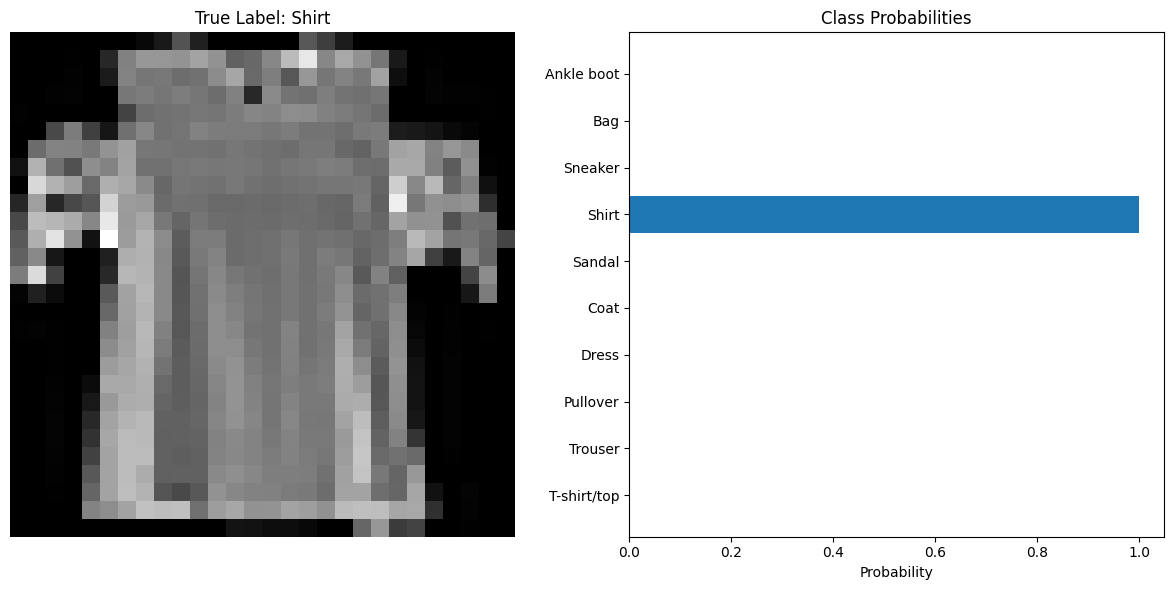

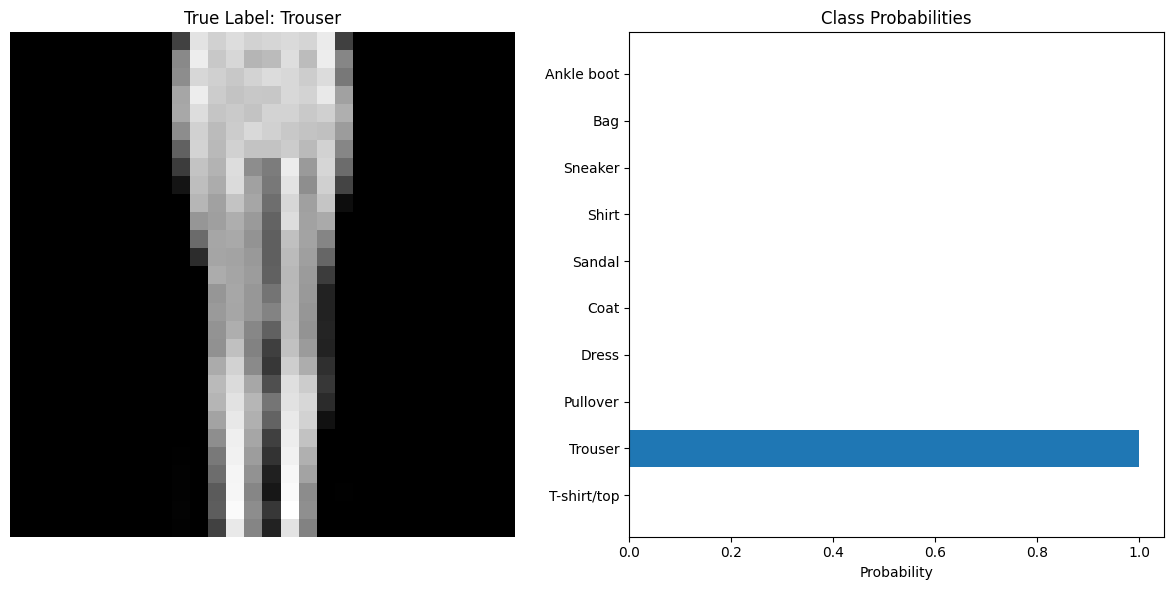

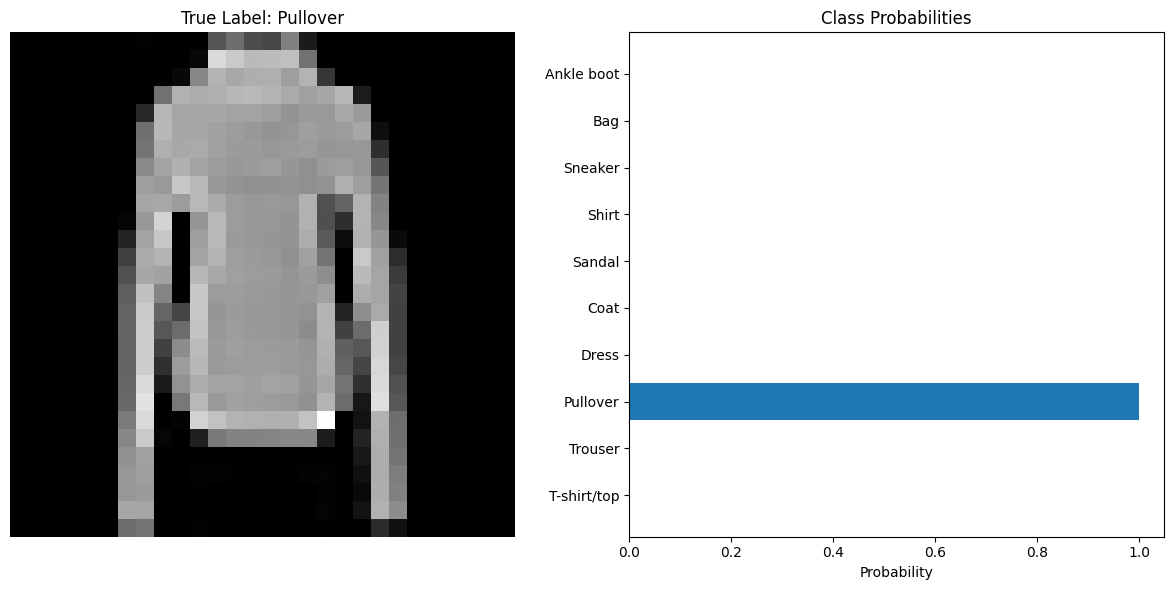

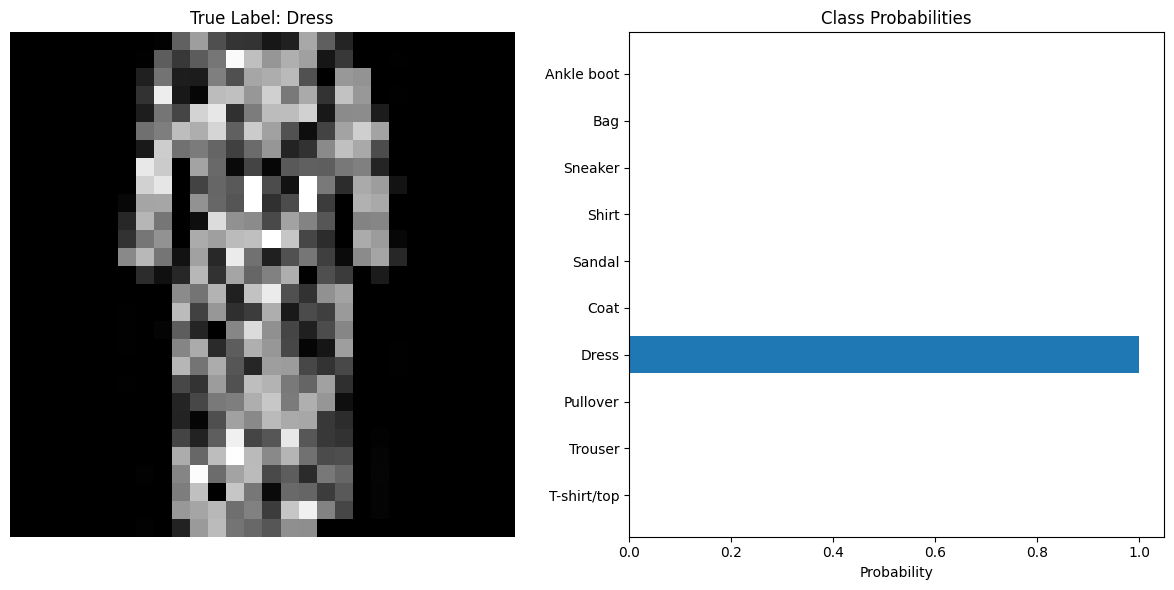

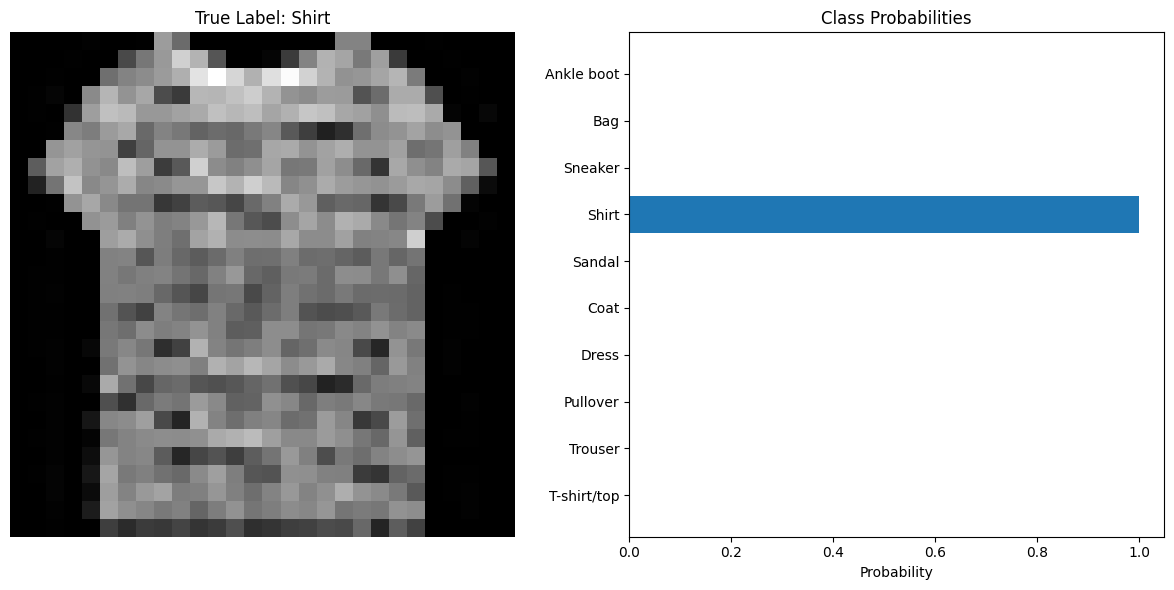

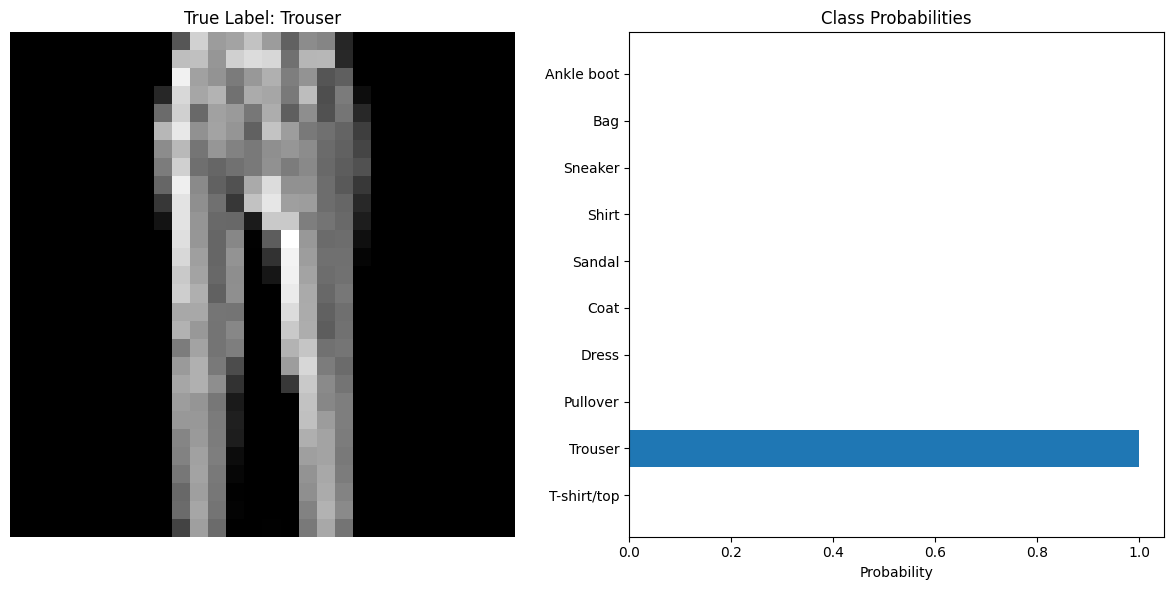

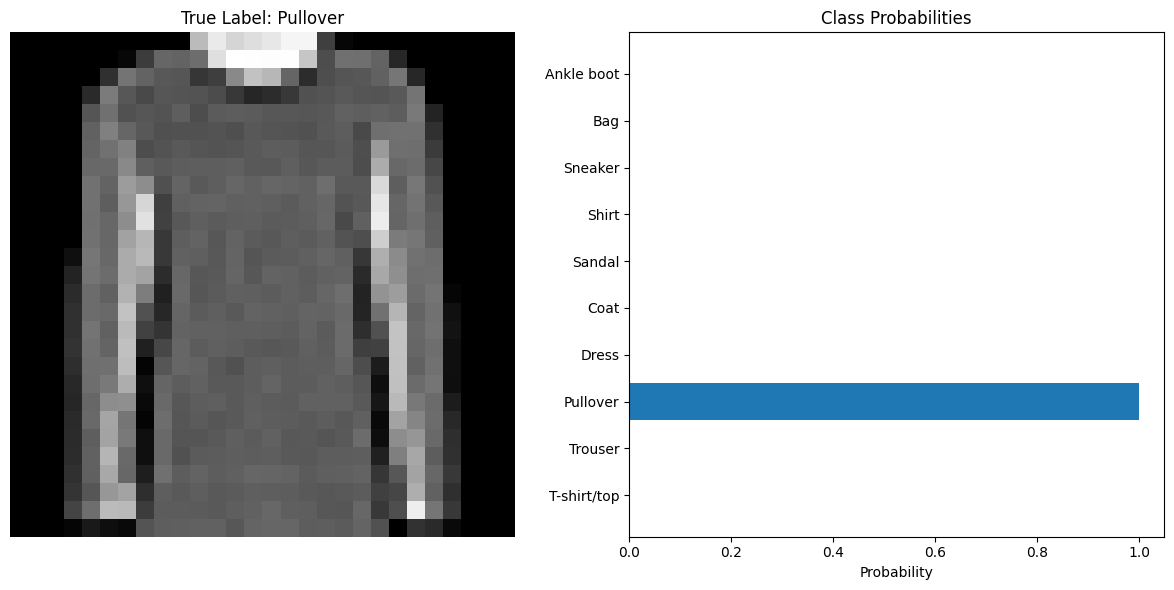

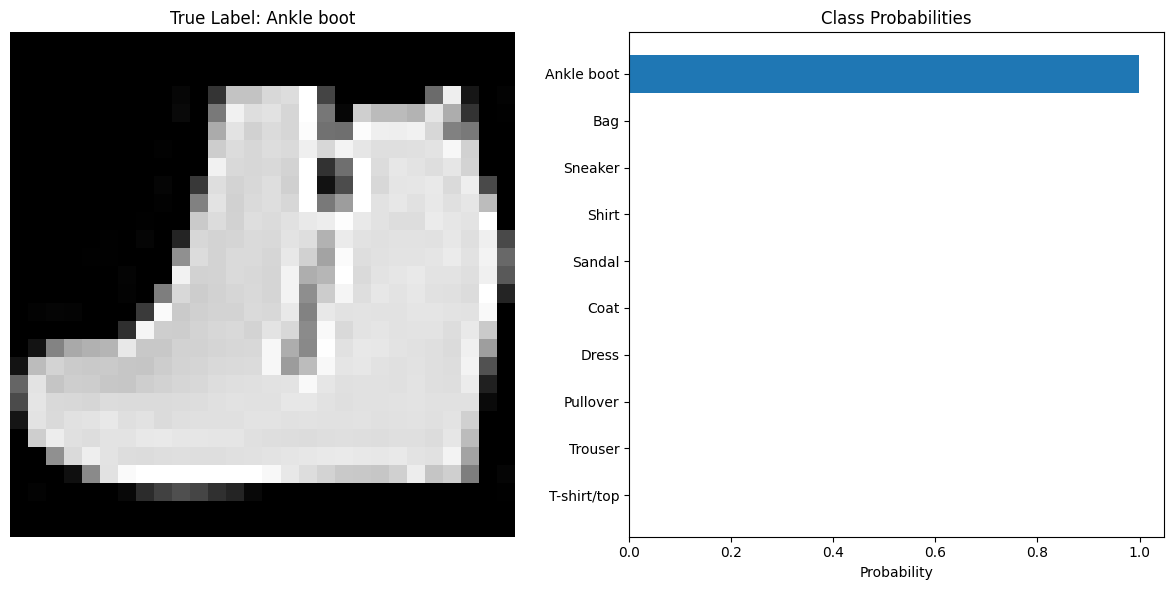

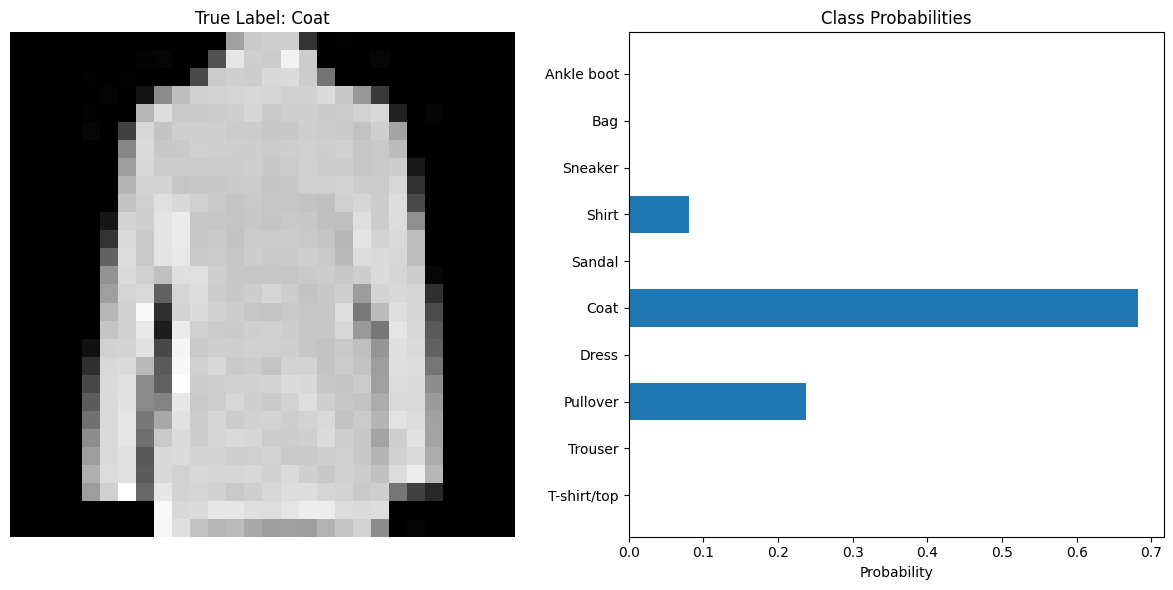

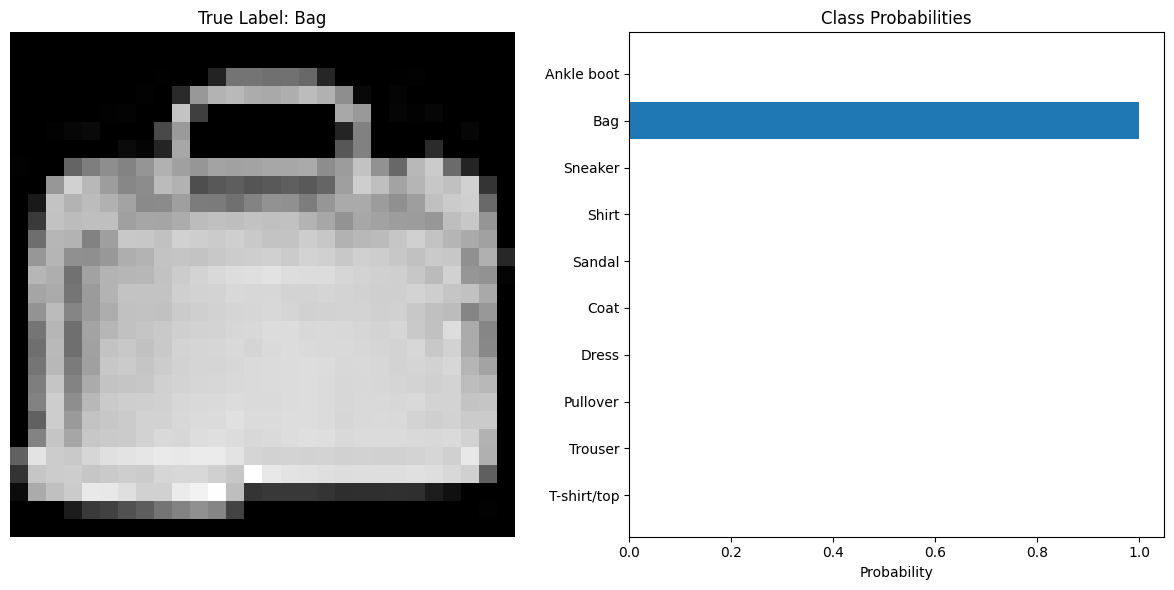

In [ ]:
import matplotlib.pyplot as plt

def view_prediction(image, label, probabilities, class_names):
    """
    Visualizes the image along with the predicted class probabilities.

    Args:
        image (torch.Tensor): The image tensor.
        label (int): The true label of the image.
        probabilities (torch.Tensor): The predicted class probabilities.
        class_names (list): The list of class names.

    Returns:
        None
    """
    # Convert image tensor to numpy array for plotting
    image = image.permute(1, 2, 0).cpu().numpy().squeeze()

    # Plot the image
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'True Label: {class_names[label]}')
    plt.axis('off')

    # Plot the class probabilities
    plt.subplot(1, 2, 2)
    y_pos = np.arange(len(class_names))
    plt.barh(y_pos, probabilities.cpu().numpy())
    plt.yticks(y_pos, class_names)
    plt.xlabel('Probability')
    plt.title('Class Probabilities')

    plt.tight_layout()
    plt.show()

# Class names for FashionMNIST dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Example usage
model.eval()
with torch.no_grad():
    # Get a batch of data
    dataiter = iter(dl)
    images, labels = next(dataiter)

    # Move tensors to the configured device (GPU or CPU)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    images, labels = images.to(device), labels.to(device)

    # Get predictions
    outputs = model(images)
    probabilities = torch.nn.functional.softmax(outputs, dim=1)

    # View predictions for the first 10 images in the batch
    num_images = 10
    for i in range(num_images):
        view_prediction(images[i], labels[i].item(), probabilities[i], class_names)


### Save the model

In [ ]:
torch.save(model, 'model')

### Calculate accuracy on the test set

In [ ]:
test_dataset = FashionMNIST('MNIST_data/', download = True, train = False, transform = transform)
test_dl = DataLoader(test_dataset, batch_size)

In [53]:
import torch

def evaluate(model, test_dl):
    """
    Evaluates your model on the test data.

    Args:
        model: ImageClassifierNet object
        test_dl: test dataloader

    Returns:
        Test accuracy.
    """
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in test_dl:
            # Move tensors to the configured device (GPU or CPU)
            device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model(images)

            # Get predictions
            _, predicted = torch.max(outputs, 1)

            # Total number of labels
            total += labels.size(0)

            # Total correct predictions
            correct += (predicted == labels).sum().item()

    # Calculate test accuracy
    test_accuracy = correct / total


    return test_accuracy





In [54]:
print("Test Accuracy = {:.4f}".format(evaluate(model, test_dl)))

Test Accuracy = 0.9136
